In [1]:
#k-mean clustering

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = "/Users/bhavithakula/Documents/practicum/python/cleaned_customer_shopping_data.csv"
df = pd.read_csv(file_path)

In [7]:
# Convert 'invoice_date' to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Create a new feature for total spending
df['total_spent'] = df['quantity'] * df['price']

In [9]:
# Prepare data for clustering using RFM (Recency, Frequency, Monetary) Analysis
rfm_data = df.groupby('customer_id').agg({
    'invoice_date': lambda x: (df['invoice_date'].max() - x.max()).days,  # Recency (days since last purchase)
    'invoice_no': 'count',  # Frequency (total number of purchases)
    'total_spent': 'sum'  # Monetary (total spending)
}).reset_index()

In [11]:
# Rename columns for clarity
rfm_data.rename(columns={'invoice_date': 'recency', 'invoice_no': 'frequency', 'total_spent': 'monetary'}, inplace=True)

# Standardize the RFM data for clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['recency', 'frequency', 'monetary']])


In [13]:
# Determine the optimal number of clusters using the Elbow Method
inertia_values = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertia_values.append(kmeans.inertia_)

In [15]:

# Apply K-Means Clustering with the optimal number of clusters (assumed k=4 based on the elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm_data['segment'] = kmeans.fit_predict(rfm_scaled)

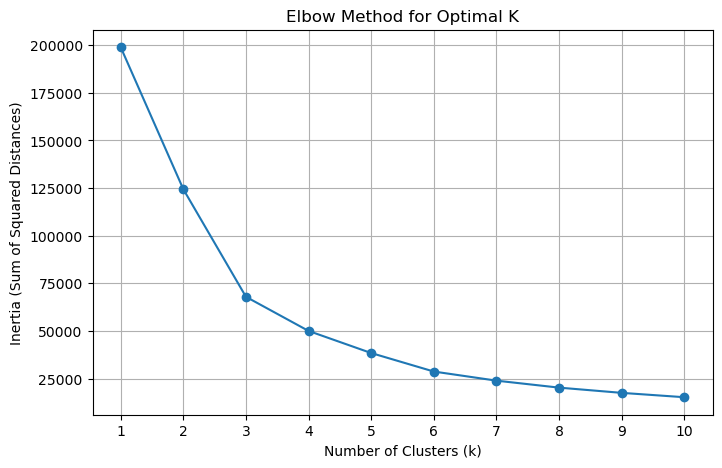

  customer_id  recency  frequency  monetary  segment
0     C100004      467          1   7502.00        3
1     C100005        5          1   2400.68        0
2     C100006       97          1    322.56        0
3     C100012      570          1    130.75        2
4     C100019      591          1     35.84        2


In [17]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Display first few rows of the clustered data
print(rfm_data.head())
